In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v3')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [4]:
env.reset()

c:\Users\ithompson\rl\Lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[228,  92,  16],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [228,  92,  16]],

       [[228,  92,  16],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [228,  92,  16]],

       [[228,  92,  16],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [228,  92,  16]]

In [5]:
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

c:\Users\ithompson\rl\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
c:\Users\ithompson\rl\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [6]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(1000):
# Start the game to begin with
    if done:
        env.reset()
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    done = terminated or truncated
    env.render()
env.close()

c:\Users\ithompson\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
c:\Users\ithompson\rl\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
c:\Users\ithompson\rl\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [7]:
# Install pytorch
#old version
# !pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

#new version
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Install stable baselines for RL stuff
!pip install stable-baselines3[extra]


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [10]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v3', apply_api_compatibility=True, render_mode="human")
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

c:\Users\ithompson\rl\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(
c:\Users\ithompson\rl\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [11]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [12]:
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)
state = env.reset()

In [13]:
for i in range(55):
    state, reward, done, info = env.step([4])

c:\Users\ithompson\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


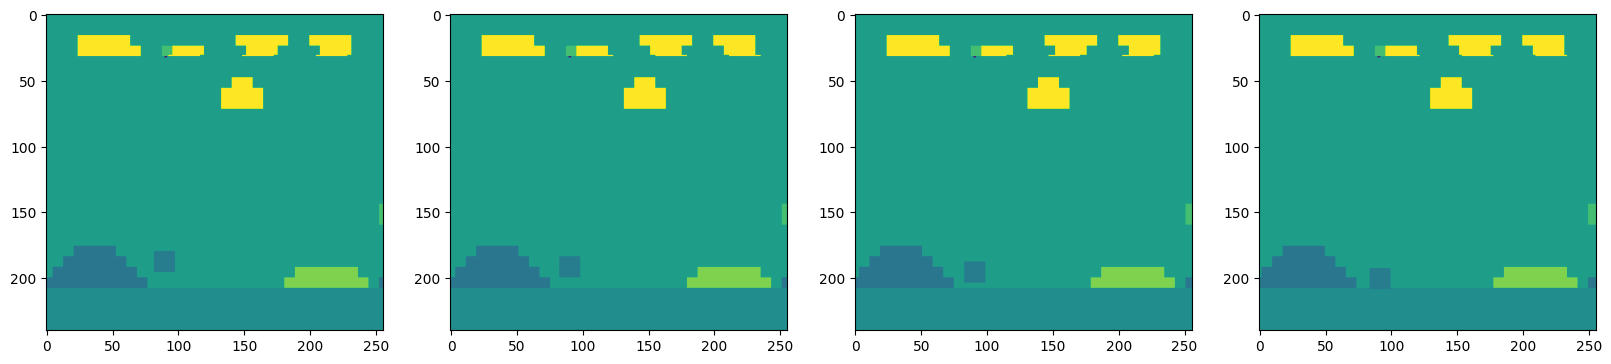

In [14]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

Here we actually start training the model on the environment

In [15]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [16]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [17]:
CHECKPOINT_DIR = 'C:/Users/ithompson/ml_train/python scripts/models/mario_ppo/bestmodel'
LOG_DIR = 'C:/Users/ithompson/ml_train/python scripts/models/mario_ppo/tensorboard'

In [18]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [19]:
# import torch
# torch.cuda.is_available()

In [20]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)


cuda


In [21]:
LOG_DIR = "C://Users//ithompson//rl//mario_logdir"

In [22]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) #steps indicates how long before the model is updated

Using cuda device
Wrapping the env in a VecTransposeImage.


In [23]:
!tensorboard --logdir {LOG_DIR}

UsageError: Line magic function `%tensorboard` not found.


In [24]:
# Train the AI model, this is where the AI model starts to learn
#can actually beat the level at 4M steps
model.learn(total_timesteps=4000000, callback=callback)

Logging to C://Users//ithompson//rl//mario_logdir\PPO_3


c:\Users\ithompson\rl\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 55  |
|    iterations      | 1   |
|    time_elapsed    | 9   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 60            |
|    iterations           | 2             |
|    time_elapsed         | 17            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 4.9818773e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00273       |
|    learning_rate        | 1e-06         |
|    loss                 | 150           |
|    n_updates            | 10            |
|    policy_gradient_loss | 1.36e-05      |
|    value_loss           | 375           |
-------------------------------------------
-----

In [ ]:
print(model)

In [ ]:
model.save("C:/Users/ithompson/ml_train/python scripts/models/mario_ppo/bestmodel")

In [ ]:
# Load model
model = PPO.load('C:/Users/ithompson/ml_train/python scripts/models/mario_ppo/bestmodel')

In [ ]:
state = env.reset()

In [ ]:
# Start the game =, test out the model
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

c:\Users\ithompson\rl\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
c:\Users\ithompson\rl\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [ ]:
env.close()